# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


**Task 1: Data Validation & Data Cleaning**
The dataset is containing **8 columns and 947 rows** with missing values in 5 out of 8 columns, before data cleaning. All columns are validated against the criteria in the dataset table:
- recipe: Unique identifier. Is as described, no missing values.
- calories: Not as described. Data type is float, is converted to int, as it should be. Column is also missing 52 values. Missing values is imputed with the calories median by category.
- carbohydrate: Not as described. Data type is float, is converted to int, as it should be. Column is also missing 52 values. Missing values is imputed with the calories median by category.
- sugar: Not as described. Data type is float, is converted to int, as it should be. Column is also missing 52 values. Missing values is imputed with the calories median by category.
- protein: Not as described. Data type is float, is converted to int, as it should be. Column is also missing 52 values. Missing values is imputed with the calories median by category.
- category: is not as described. The column has 1 additional category compared to the describtion. The extra category is 'Chicken Breast', 'Brest' is removed from category. The column has no missing values.
- servings: is not as described. Data type is pandas object(string), because 3 rows is also containg text('as a snack'). Text is removed from rows, and dtype is converted to int.
- high_traffic: is as described, but is missing 373 values. NaN's are replaced with the string 'Unknown'. The reason for this is that some of these have been shown on the homepage with a 'low traffic' as the result, but since these haven't been logged as low, we can't distinguish recipes that have been shown with low traffic as a result, from the recipes that haven't been shown on the homepage.

Median is chosen as imputation for the nutrients, because of the large number of outliers, see boxplots.

After data validation and data cleaning four additional columns are created from each recipes nutrients time the number of servings.

After the data validation, the dataset is now containing **11 columns and 947 rows**.


In [44]:
# importing liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.inspection import permutation_importance


# reading the csv-file
recipe_df = pd.read_csv('recipe_site_traffic_2212.csv')
# controll the data is correctly loaded
print(recipe_df.head())
pd.set_option('display.max_columns', None)

   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  


In [45]:
# data inspection
print("Informations about the df")
print(recipe_df.info())
print("Describtion of the columns values")
print(recipe_df.describe())

Informations about the df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None
Describtion of the columns values
           recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.

In [46]:
for col in recipe_df.columns:
    print(recipe_df[col].value_counts())

1      1
637    1
625    1
626    1
627    1
      ..
320    1
321    1
322    1
323    1
947    1
Name: recipe, Length: 947, dtype: int64
47.89     2
34.97     2
529.26    2
128.30    2
35.48     1
         ..
92.21     1
472.91    1
409.03    1
31.75     1
184.56    1
Name: calories, Length: 891, dtype: int64
3.46     3
6.40     3
9.58     3
5.14     3
7.73     3
        ..
96.03    1
0.86     1
11.83    1
39.55    1
45.21    1
Name: carbohydrate, Length: 835, dtype: int64
1.62    5
1.51    5
2.97    4
1.27    4
0.77    4
       ..
5.44    1
1.80    1
2.00    1
9.00    1
6.20    1
Name: sugar, Length: 666, dtype: int64
0.36      6
0.93      4
0.02      4
0.04      4
0.38      4
         ..
22.89     1
169.78    1
14.14     1
15.08     1
8.07      1
Name: protein, Length: 772, dtype: int64
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79


In [47]:
# replacing string from category column
recipe_df.category = recipe_df.category.str.replace(' Breast', '')
# controllig if 'Breast' is correctly removed
print(recipe_df.category.value_counts())
# replacing string from servings column
recipe_df.servings = recipe_df.servings.str.replace(' as a snack', '')
recipe_df.servings = recipe_df.servings.astype('int')
# controlling if 'as a snack' is correctly removed and correctly converting of dtype
print(recipe_df.servings.value_counts(), recipe_df.servings.dtypes)
# replacing NaN's with a string 'Unknown'
recipe_df.high_traffic = recipe_df.high_traffic.fillna('Unknown')
# controlling that NaN's are correctly replaced
print(recipe_df.high_traffic.value_counts())

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64
4    391
6    198
2    183
1    175
Name: servings, dtype: int64 int64
High       574
Unknown    373
Name: high_traffic, dtype: int64


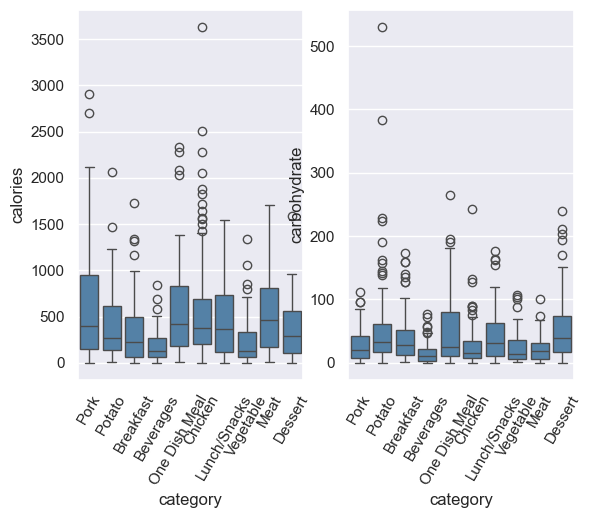

In [48]:
#set seaborn plotting aesthetics as default
sns.set()
# defining dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1,2)
# creating a boxplot of calories by category
sns.boxplot(data=recipe_df, x='category', y='calories', ax=axes[0], color='steelblue')
# creating a boxplot of carbohydrate by category
sns.boxplot(data=recipe_df, x='category', y='carbohydrate', ax=axes[1], color='steelblue')
# rotating the xtricks
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 60)
plt.show()

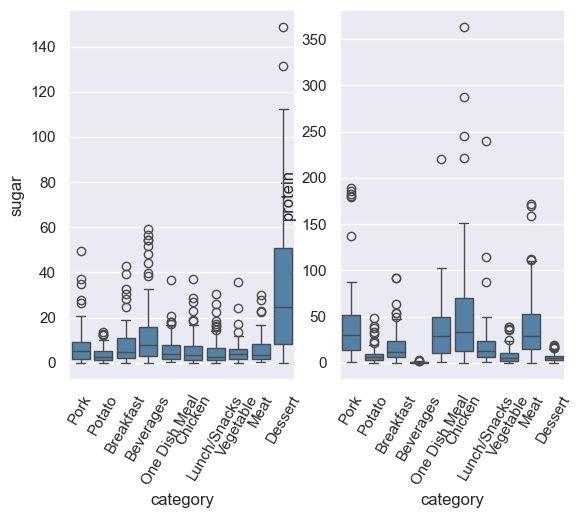

In [49]:
#set seaborn plotting aesthetics as default
sns.set()
# defining dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1,2)
# creating a boxplot of sugar by category
sns.boxplot(data=recipe_df, x='category', y='sugar', ax=axes[0], color='steelblue')
# creating a boxplot of protein by category
sns.boxplot(data=recipe_df, x='category', y='protein', ax=axes[1], color='steelblue')
# rotating the xtricks
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 60)
plt.show()    

In [50]:
# creating list of columns to loop through
columns = ['calories', 'carbohydrate', 'sugar', 'protein']
# intianting for loop
for col in recipe_df.columns:
    if col in columns:
        # calculating median of the given column by category
        var = recipe_df.groupby('category')[col].median()
        # converting to a dictionary
        var_dict = var.to_dict()
        # map the dictionary to missing values of given column by category
        recipe_df[col] = recipe_df[col].fillna(recipe_df.category.map(var_dict))
        # converting date type to 'int'
        recipe_df[col] = recipe_df[col].astype('int')
    else:
        continue        

In [51]:
# creating columns with total amount of nutrients
for col in columns:
    recipe_df['total_'+col] = recipe_df[col] * recipe_df['servings']
# controlling previous opretation        
print(recipe_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   recipe              947 non-null    int64 
 1   calories            947 non-null    int64 
 2   carbohydrate        947 non-null    int64 
 3   sugar               947 non-null    int64 
 4   protein             947 non-null    int64 
 5   category            947 non-null    object
 6   servings            947 non-null    int64 
 7   high_traffic        947 non-null    object
 8   total_calories      947 non-null    int64 
 9   total_carbohydrate  947 non-null    int64 
 10  total_sugar         947 non-null    int64 
 11  total_protein       947 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 88.9+ KB
None


**Task 2: Exploratory Analysis**

- Exploratory Analysis:  
    - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings

**Single variables graphics**

Here we see the summary statistics and boxplots of the datasets two categorical columns. The 'category'-columns has 10 unique categories, with the 'Chicken'-category being the most frequent. The rest of the categories are distributed between 70 and 105 times. The 'high_traffic'-column has two categories, 'High' and 'Unknown'. It is this column that is the target of this analysis, we are trying to predict which of the 373 'Unknown' recipes will result in High traffic on the homepage.

       category high_traffic
count       947          947
unique       10            2
top     Chicken         High
freq        172          574


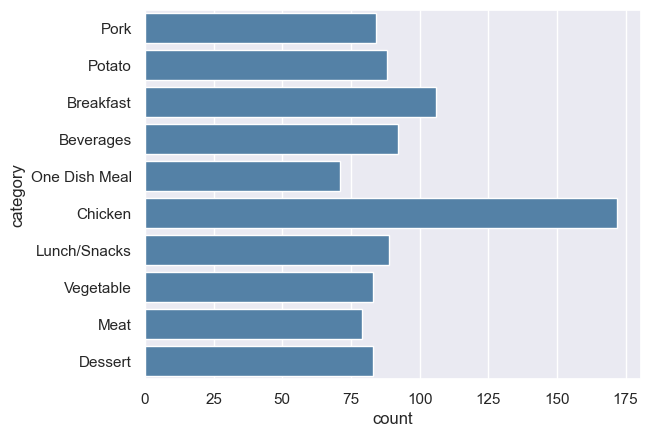

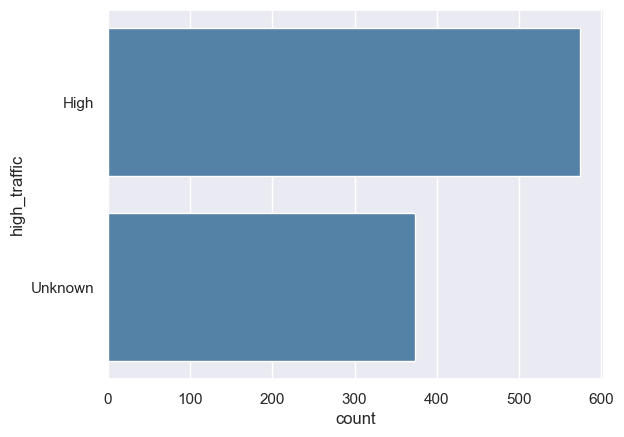

In [52]:
# printing object columns
print(recipe_df.describe(include='object'))

for column in recipe_df.select_dtypes(include='object'):
    if recipe_df[column].nunique() < 11:
        sns.countplot(y=column, data=recipe_df, color='steelblue')
        plt.show()

Here we see the summary statistics and histograms of the numerical columns. When looking at the four columns of nutrients we see that they are all right skewed. The 'servings'-column is the distribution that resamples a normal distribution the most. With four servings as the most frequent, which also make sense when thinking about most recipes are target the nuclear family. The 'recipe'-column is the index column, and it doesn't need much attention. We will apply a _log transformation_ to the **calories, carbohydrate, sugar** and **protein** columns, to make them resample a normal distribution much more.

          calories  carbohydrate       sugar     protein    servings
count   947.000000    947.000000  947.000000  947.000000  947.000000
mean    430.591341     33.937698    8.392819   23.464625    3.477297
std     441.379239     42.852756   14.371096   35.469690    1.732741
min       0.000000      0.000000    0.000000    0.000000    1.000000
25%     114.000000      9.000000    1.000000    3.000000    2.000000
50%     296.000000     21.000000    4.000000   11.000000    4.000000
75%     576.000000     42.000000    9.000000   29.000000    4.000000
max    3633.000000    530.000000  148.000000  363.000000    6.000000


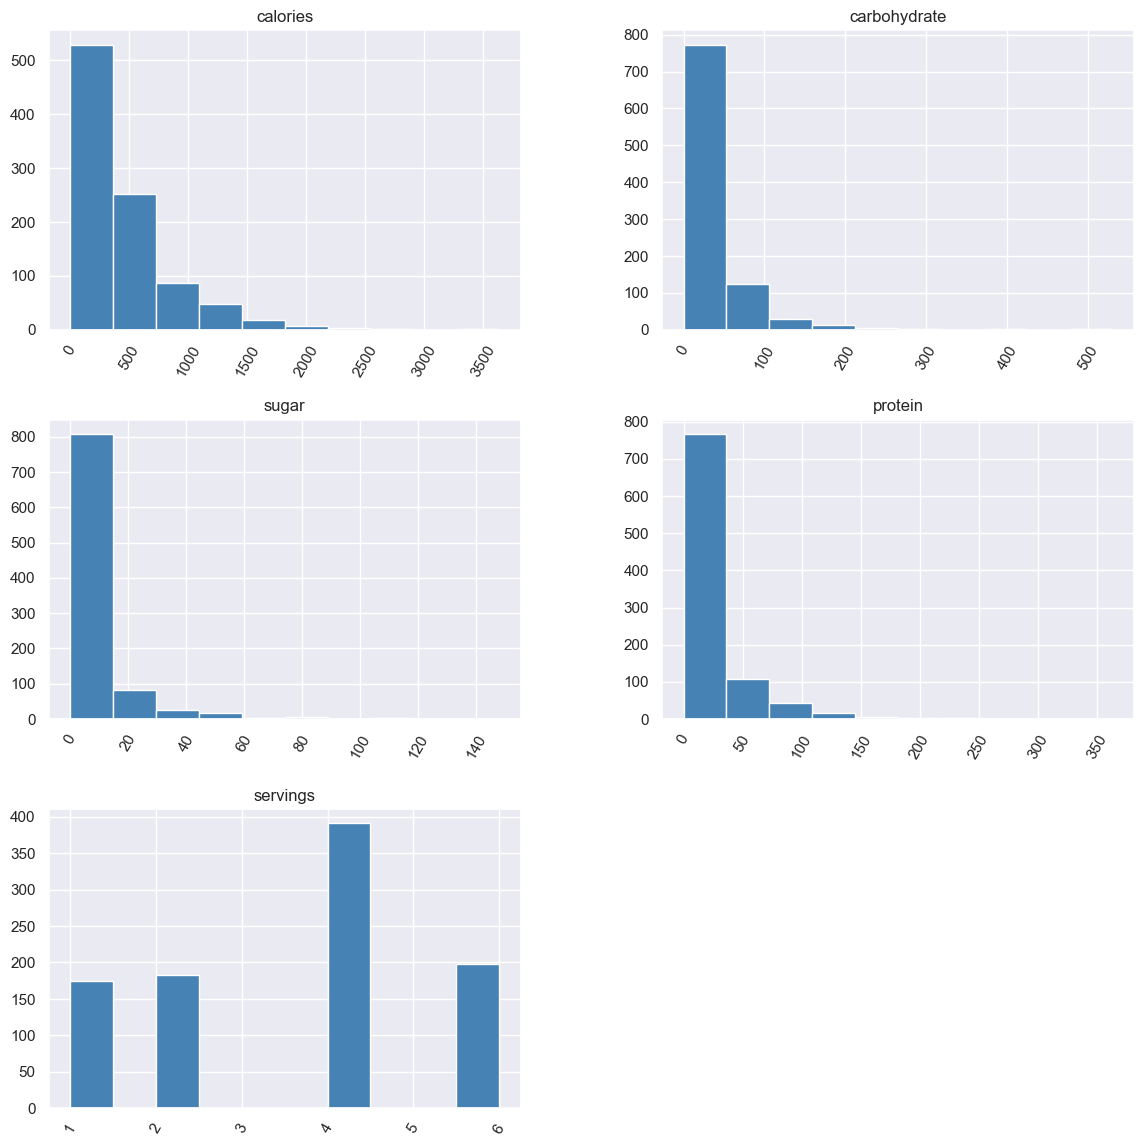

In [53]:
# printing nutrients columns
print(recipe_df[['calories', 'carbohydrate', 'sugar', 'protein', 'servings']].describe())
# hist plot of nutriens columns
recipe_df[['calories', 'carbohydrate', 'sugar', 'protein', 'servings']].hist(figsize=(14,14), xrot=60, color='steelblue')
plt.show()

Here you see the histograms of the log transformed columns.

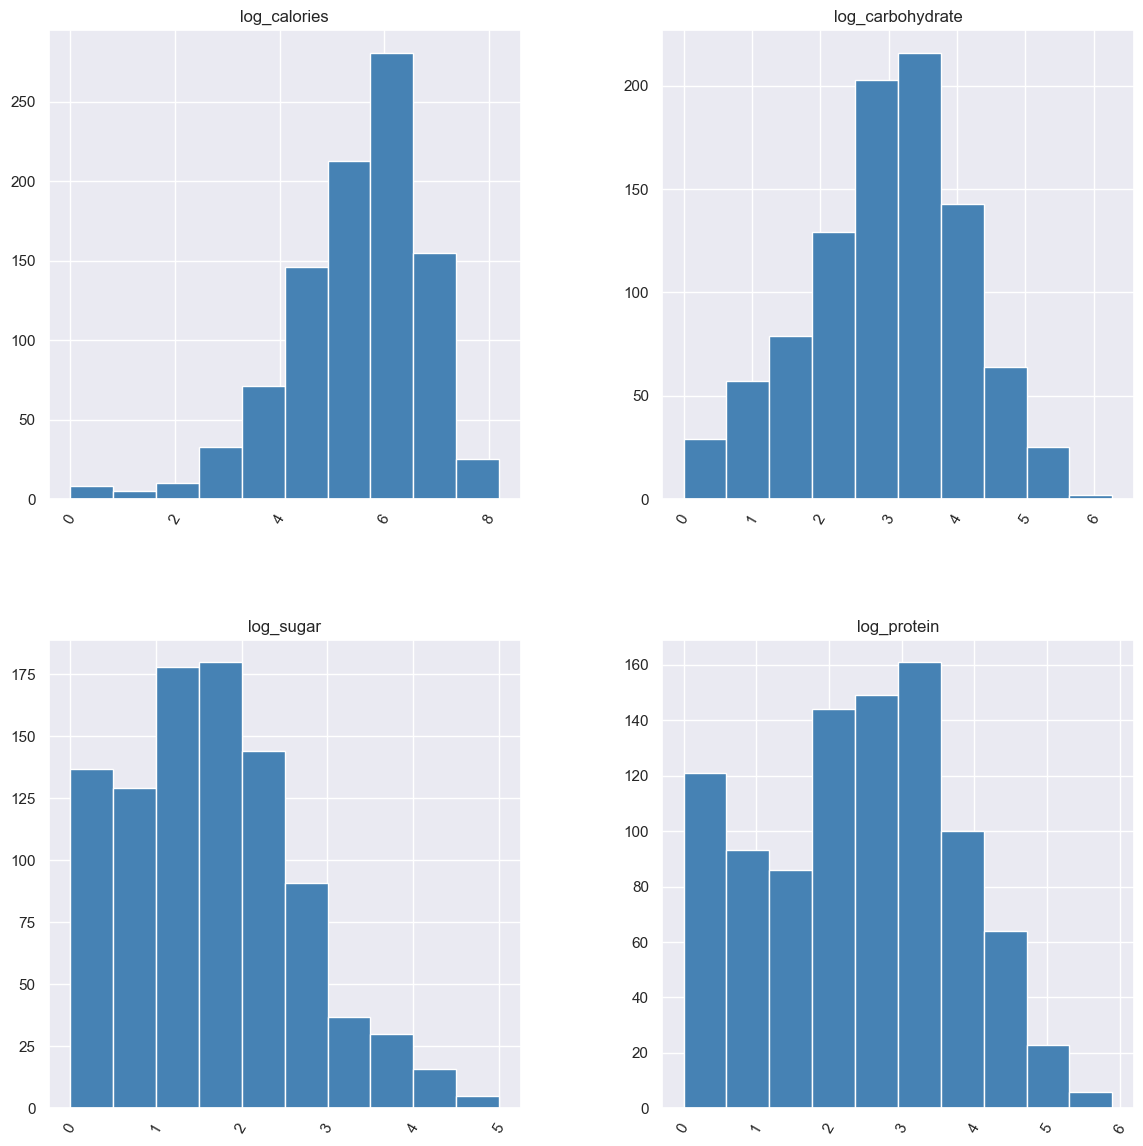

In [54]:
# log tranformation of nutriens columns
recipe_df['log_calories'] = np.log1p(recipe_df.calories)
recipe_df['log_carbohydrate'] = np.log1p(recipe_df.carbohydrate)
recipe_df['log_sugar'] = np.log1p(recipe_df.sugar)
recipe_df['log_protein'] = np.log1p(recipe_df.protein)
log_columns = recipe_df[['log_calories', 'log_carbohydrate', 'log_sugar', 'log_protein']]
log_columns.hist(figsize=(14,14), xrot=60, color='steelblue')
plt.show()

**Multiple variable graphics**

In the heatmap below we can see that there is a small to moderate positive relationship between the variables. The only exception from this assumption is the relationship between 'total_sugar' and 'total_protein', which has a very small negative relation, it is almost zero. These relationships are confirmed by the pairplot following the heatmap.

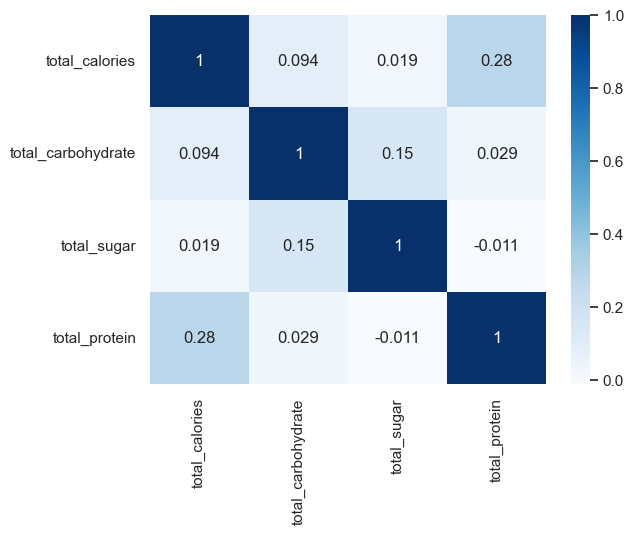

In [55]:
# calculating correlations between total nutriens columns and creating heatmap
corr = recipe_df[['total_calories', 'total_carbohydrate', 'total_sugar', 'total_protein']].corr()
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

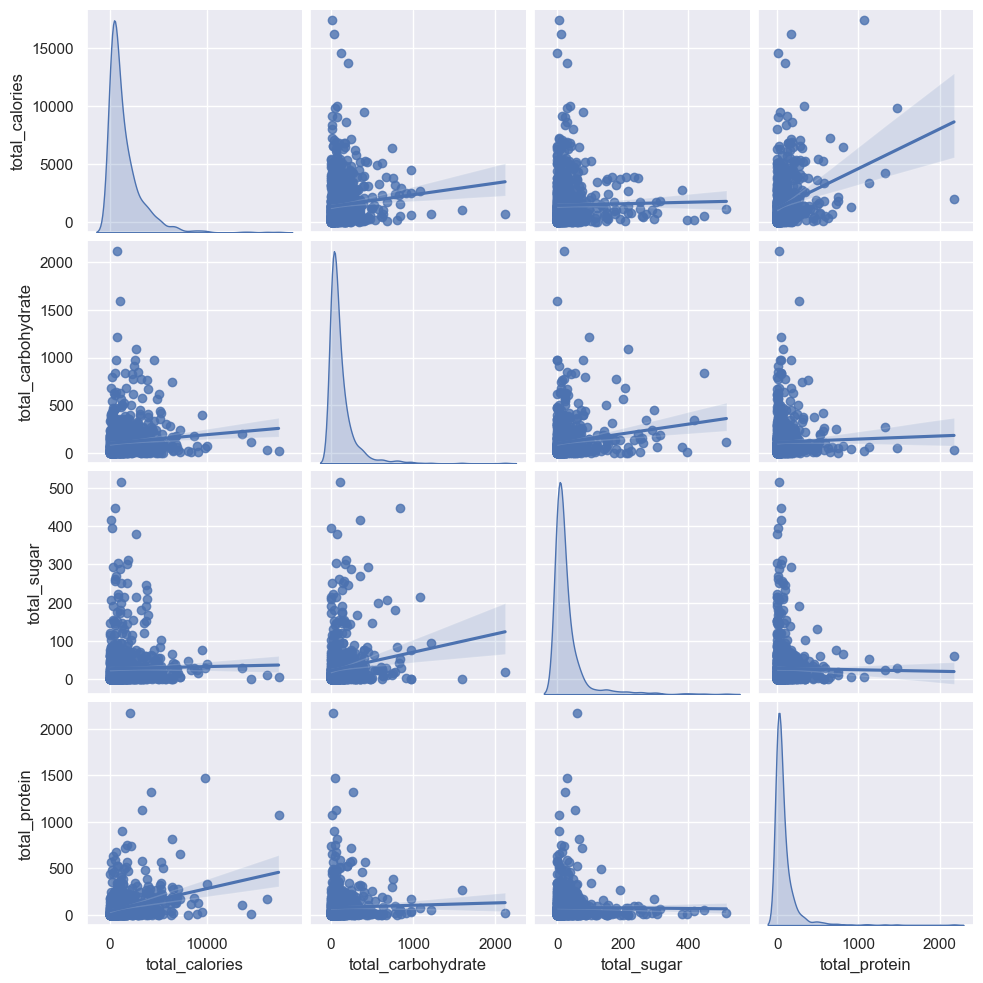

In [56]:
# plotting parplot of total nutriens columns
sns.pairplot(data=recipe_df, vars=['total_calories', 'total_carbohydrate', 'total_sugar', 'total_protein'], kind="reg", diag_kind='kde', palette='steelblue')
plt.show()

Below is shown some boxplots. Here we see the relationship between each nutrients-columns and the category column, the data is also shared between the 'high_traffic'-column. In the 'protein'-column we see that the 'biggest' categories are the Pork, Chicken and Meat, whereas the 'smallest' are Potato, Beverages and surprise, surprise Dessert.

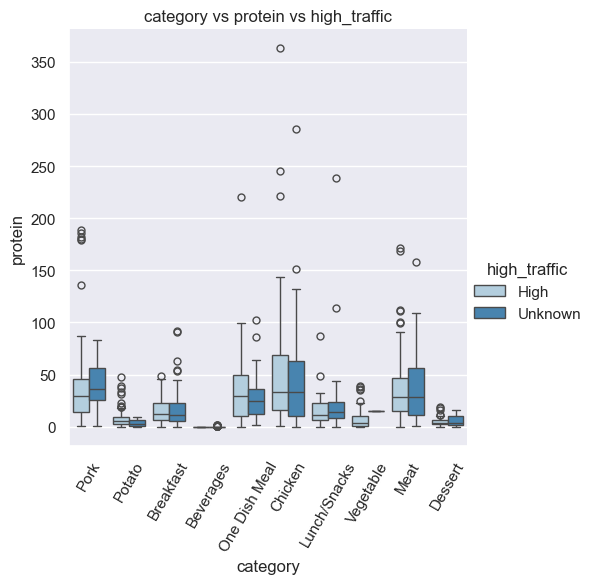

In [57]:
sns.catplot(data=recipe_df, x='category', y='protein', hue='high_traffic', kind='box', palette='Blues').set(title='category vs protein vs high_traffic')
plt.xticks(rotation = 60)
plt.show()

For the 'sugar'-column the only category that stands out is the Dessert, else the rest of the categories are equally distributed.

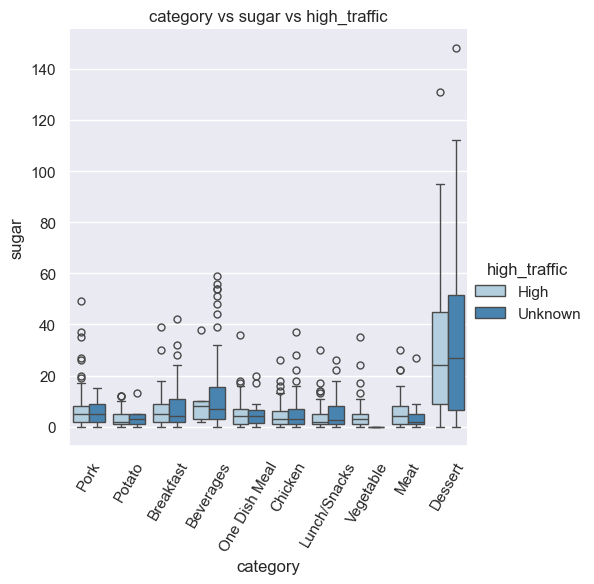

In [58]:
sns.catplot(data=recipe_df, x='category', y='sugar', hue='high_traffic', kind='box', palette='Blues').set(title='category vs sugar vs high_traffic')
plt.xticks(rotation = 60)
plt.show()

The 'calories'-column seems to be more equally distributed between all the categories. In this column very few recipes from the Beverage category is labeled as 'High'. The labels for this column can be difficult to predict, because six of the categories are distributed with either 50/50 or more 'Unknown' labels.

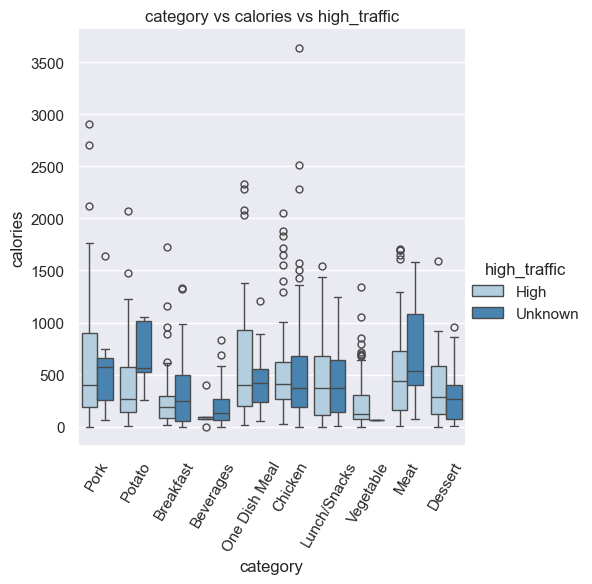

In [59]:
sns.catplot(data=recipe_df, x='category', y='calories', hue='high_traffic', kind='box', palette='Blues').set(title='category vs calories vs high_traffic')
plt.xticks(rotation = 60)
plt.show()

For the 'carbohydrate'-column the Potato, Breakfast, One Dish Meal, Lunch/Snacks and Dessert categories are the biggest. Out of these categories only the One Dish Meal category has more points labeled as 'High' then 'Unknown'.

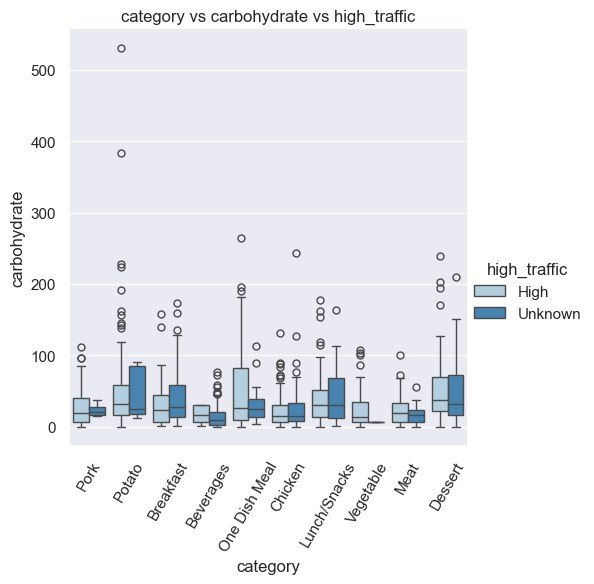

In [60]:
sns.catplot(data=recipe_df, x='category', y='carbohydrate', hue='high_traffic', kind='box', palette='Blues').set(title='category vs carbohydrate vs high_traffic')
plt.xticks(rotation = 60)
plt.show()

When we look at the 'servings'-column we see that eight out of ten categories are has at least 50/50 or more points labeled as 'High', it is the 'Meat' -and 'Dessert'-columns that doesn't follow this pattern. The categories with most 6-servings are Pork, Potato, Beverage, and Dessert. One thing that is repeated through all the boxplots is that vegetable category has very few 'Unknown'-labels.

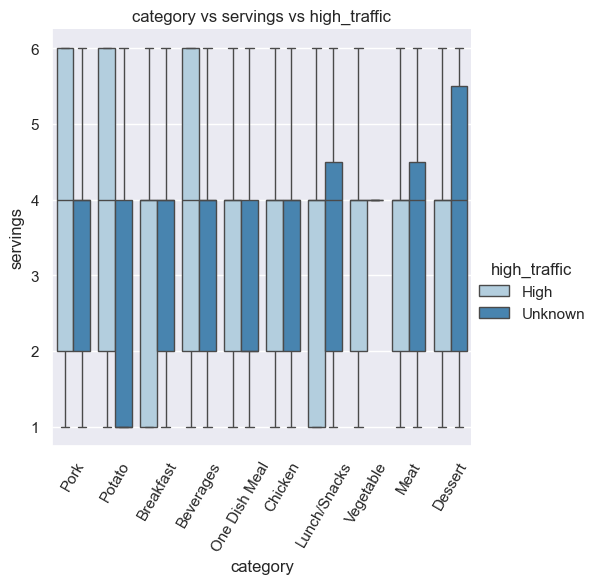

In [61]:
sns.catplot(data=recipe_df, x='category', y='servings', hue='high_traffic', kind='box', palette='Blues').set(title='category vs servings vs high_traffic')
plt.xticks(rotation = 60)
plt.show()

**Task 3: Model Development**

Predicting the high_traffic lables, which is a discrete binary variable, is a **classification problem.**
Before creating and training a **baseline model** and a **comparison model**, we first need to make our data ready for the **classification algorithms**.
First, we convert our target variable, **high_traffic** to numeric binary values. Then we are encoding the **category-column** by the frequency of each _recipe-category_.

The _baseline model_ is a **Logistic Regression Classifier**, and the _comparison model_ is a **Decision Tree Classifier**. These algorithms are chosen because of their well know history of good performances on binary classification tasks. They are both eager learns, meaning that they spend more time during the training process because of their eagerness to have a better generalization during the training from learning the weights. 



In [62]:
# converting the high_traffic column to binary values
recipe_df.high_traffic = recipe_df.high_traffic.replace('High', 1)
recipe_df.high_traffic = recipe_df.high_traffic.replace('Unknown', 0)
# transform the category column
fe = recipe_df.groupby('category').size()
fe_ = fe / len(recipe_df.category)
recipe_df.category = recipe_df.category.map(fe_).round(3)
# print dtypes
print(recipe_df.dtypes)

recipe                  int64
calories                int64
carbohydrate            int64
sugar                   int64
protein                 int64
category              float64
servings                int64
high_traffic            int64
total_calories          int64
total_carbohydrate      int64
total_sugar             int64
total_protein           int64
log_calories          float64
log_carbohydrate      float64
log_sugar             float64
log_protein           float64
dtype: object


Then we are splitting our data into our _features_ also called **X** and our _target variable_ also called **y**. When that is done, we split the data 80-20% into a training set and a test set. Then the data is scaled.

In [63]:
# Creating the X and y variables
feature_cols = ['log_calories', 'log_carbohydrate', 'log_sugar', 'log_protein', 'category', 'servings']
X = recipe_df[feature_cols]
y = recipe_df.high_traffic
# Split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(757, 6) (190, 6) (757,) (190,)


For the **Logistic Regression Classifier**, I'm making a Grid Search to find the best model from a selection of parameters, before the model is trained.

After performing the Grid Search, I'm training a model with the following parameters: _C=0.0001, penalty='l2', tol=0.0001, random_state=42_.

In [64]:
# create Logistic Regression model
lr = LogisticRegression(random_state=42)
# define hyperparameter grid for Logistic Regression
params_lr = {'penalty': ['l1', 'l2', 'elasticnet', None],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.0001, 1.0, 50)}
# create a GridSearch with 10 folds
lr_cv = GridSearchCV(lr, params_lr, cv=25)
# training the model
lr_cv.fit(X_train, y_train)
# calculating ROC AUC Score
y_pred_proba = lr_cv.best_estimator_.predict_proba(X_test)[:,1]
lr_roc_auc = roc_auc_score(y_test, y_pred_proba)
# print the best params
print(f'The best model is: {lr_cv.best_estimator_}')
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))
print('Test set ROC AUC score: {:.3f}'.format(lr_roc_auc))

The best model is: LogisticRegression(C=0.0001, penalty=None, random_state=42)
Tuned Logistic Regression Parameters: {'C': 0.0001, 'penalty': None, 'tol': 0.0001}
Test set ROC AUC score: 0.707


Here the final model, **_log_reg_**, is created and trained with the best parameter from the Grid Search.

In [65]:
# creating Logistic Regression model with the hyperparameters
log_reg = LogisticRegression(C=0.0001, penalty=None, tol=0.0001, random_state=42)
# fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, penalty=None, random_state=42)

For the **Decision Tree Classifier**, I'm also making a Grid Search to find the best model from a selection of parameters, before the model is trained.

After performing the Grid Search, I'm training a model with the following parameters: _criterion='entropy', max_depth=2, min_samples_leaf=0.02, min_samples_split=2, random_state=42_.

In [66]:
# create Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
# define hyperparameter grid for Decision Tree Classifier
params_dt = {'max_depth': [2,4,6,8,10,12],
            'min_samples_split': [1,2,3,4,5,6],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'min_samples_leaf': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]}
# create a GridSearch with 10 folds
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=25,
                       n_jobs=-1)
# training the model
grid_dt.fit(X_test, y_test)
# calculating ROC AUC Score
y_pred_probs = grid_dt.best_estimator_.predict_proba(X_test)[:,1]
dt_roc_auc = roc_auc_score(y_test, y_pred_probs)
# print the best params and best model
print(f'The best model is: {grid_dt.best_estimator_}')
print(f'The best models parameters are: {grid_dt.best_params_}')
print('Test set ROC AUC score: {:.3f}'.format(dt_roc_auc))

The best model is: DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=0.02,
                       random_state=42)
The best models parameters are: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 0.02, 'min_samples_split': 2}
Test set ROC AUC score: 0.837


Here the final model, _**tree,**_ is created and trained with the best parameter from the Grid Search.

In [75]:
# # create Decision Tree Classifier with hyperparameters
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=0.02, min_samples_split=2, random_state=42)
# model training
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=0.02,
                       random_state=42)

**Task 4: Model Evaluation**

To evaluate the two models, I've chosen the Accuracy and Precision score metrics. I'm doing this for several reasons. 
1. Because the Production Manager wants us to predict which recipes will lead to high traffic. For this part we will use the accuracy score.
2. The Production Manager also wants the model to correctly high traffic 80% of the time. It is here we will use the precision score. Because it measures how many of our high traffic predictions are actually correct predicted. 
3. Both metrics are among the most use metrics, and they are easy to interpret.

When we look at the **Logistic Regression Classifier** has an accuracy score of **_68.4%_** and a precision score of **70.9%**. The **Decision Tree** has an accuracy score of _**76.8%**_ and a precision score of **83.1**. Meaning that the **Decision Tree** performs better than the **Logistic Regression Classifier** on the test set.

On the two plots we can see that the buy fare most important feature is the 'category'-column which contributes with a little bit above 17.5% to the total feature importance for the **Logistic Regression**-model. Meanwhile for the **Decision Tree** the 'category'-column contributes with no less than 100% of the feature importance.


In [77]:
# predicting the Logistic Regression model
y_pred_lr = log_reg.predict(X_test)
# evaluating the model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
# printing the evaluation score
print(f'The accuracy score of the Logistic Regression Classifier is: {round(lr_accuracy*100,1)}%')
print(f'The precision score of the Logistic Regression Classifier is: {round(lr_precision*100,1)}%')

The accuracy score of the Logistic Regression Classifier is: 68.4%
The precision score of the Logistic Regression Classifier is: 70.9%


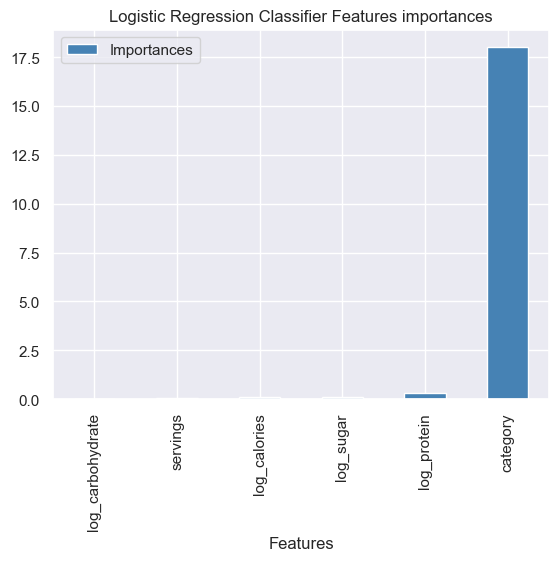

In [78]:
# getting the coefficients
coefficients = log_reg.coef_[0]
# converting coefficients to get features importances
lr_importances = pd.DataFrame({'Features': X.columns, 'Importances': np.abs(coefficients)})
# sorting the values
lr_importances = lr_importances.sort_values('Importances', ascending=True)
# plotting features importances
lr_importances.plot(x='Features', y='Importances', kind='bar', color='steelblue')
plt.title('Logistic Regression Classifier Features importances')
plt.show()

In [79]:
# predicting the Decision Tree model
y_pred_dt = tree.predict(X_test)
# evaluating the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
# printing the evaluation score
print(f'The accuracy score of the Decision Tree Classifier is: {round(dt_accuracy*100,1)}%')
print(f'The precision score of the Decision Tree Classifier is: {round(dt_precision*100,1)}%')

The accuracy score of the Decision Tree Classifier is: 76.8%
The precision score of the Decision Tree Classifier is: 83.1%


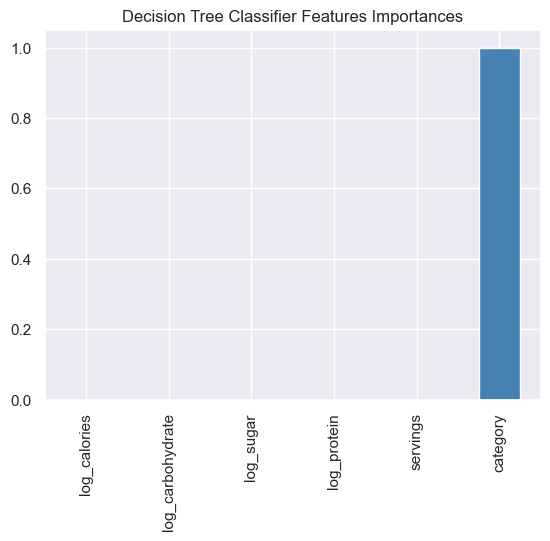

In [80]:
# getting features importances
dt_importances = pd.Series(data=tree.feature_importances_, index=X.columns)
# sorting the values
dt_importances = dt_importances.sort_values(ascending=True)
# plotting features importances
dt_importances.plot(kind='bar', color='steelblue')
plt.title('Decision Tree Classifier Features Importances')
plt.show()

**Task 5: Business Metrics**

To compare the model's performances and robustness both models are being resampled 500 time on both training and testing datasets. From these samples the Mean and Confidence Interval of 95% is being calculated. 

The results are telling that the **Logistic Regression**-model with a Confidence Interval of 95% will achieve a **accuracy** of predicted _High_-recipes between **62.6%** and **74.7**, and out these predicted _High_-recipes between **63.0%** and **78.4%** will be correctly predicted _High_ also within a Confidence Interval of 95%. The mean accuracy score for the **Logistic Regression**-model is **68.7%** and the mean precision score is around **70.5%**, so the **Logistic Regression**-model is doing a fine job here, but it does not quite reach the goal set by the Production Manager.

The **Decision Tree**-model is getting an **accuracy** between **70.2%** and **81.6%** of predicted _High_-recipes within a Confidence Interval of 95%. Out of these prediction the model correctly predicts _High_ in between **73.5%** and **86.6%** with a Confidence Interval of 95%. The **Decision Trees** mean accuracy score is around **76.0%** and the mean precision score is around **80.3%**, so the **Decision Tree**-model is acctually reaching the Production Managers goal of _correctly predicting high traffic recipes 80% of the time._

These founds visualized and confirmed by the kde-plot of the distributions of the metrics. Where we clearly can see that the **Decision Tree Classifier** is performing better on the data than the **Logistic Regression Classifier**.


In [89]:
# creating empty lists
accuracy_lr = []
precision_lr = []
# for loop for testing model robustness
for i in range(1,501):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    log_reg.fit(X_train, y_train)
    pred_lr = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, pred_lr)
    precision = precision_score(y_test, pred_lr)
    accuracy_lr.append(accuracy)
    precision_lr.append(precision)
# calculating model means     
accuracy_mean_lr = np.mean(accuracy_lr)
precision_mean_lr = np.mean(precision_lr)
# printing results
print('Mean Accuracy score of the Logistic Regression model:', accuracy_mean_lr)
print('Confidence Interval (95%) of Logistic Regression model:', np.percentile(accuracy_lr, [2.5,97.5]))
print('Mean Precision score of Logistic Regression model:', precision_mean_lr)
print('Confidence Interval (95%) of Logistic Regression model:', np.percentile(precision_lr, [2.5,97.5]))

Mean Accuracy score of the Logistic Regression model: 0.6870736842105263
Confidence Interval (95%) of Logistic Regression model: [0.62631579 0.74736842]
Mean Precision score of Logistic Regression model: 0.70483813458777
Confidence Interval (95%) of Logistic Regression model: [0.63080096 0.78442371]


In [87]:
# creating empty lists
accuracy_dt = []
precision_dt = []
# for loop for testing model robustness
for i in range(1,501):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    tree.fit(X_train, y_train)
    pred_dt = tree.predict(X_test)
    accuracy = accuracy_score(y_test, pred_dt)
    precision = precision_score(y_test, pred_dt)
    accuracy_dt.append(accuracy)
    precision_dt.append(precision)
# calculating model means     
accuracy_mean_dt = np.mean(accuracy_dt)
precision_mean_dt = np.mean(precision_dt)
# printing results
print('Mean Accuracy score of Decision Tree model:', accuracy_mean_dt)
print('Confidence Interval (95%) of Decision Tree model:', np.percentile(accuracy_dt, [2.5,97.5]))
print('Mean Precision score of Decision Tree model:', precision_mean_dt)
print('Confidence Interval (95%) of Decision Tree model:', np.percentile(precision_dt, [2.5,97.5]))

Mean Accuracy score of Decision Tree model: 0.76
Confidence Interval (95%) of Decision Tree model: [0.7025     0.81578947]
Mean Precision score of Decision Tree model: 0.8025721691396145
Confidence Interval (95%) of Decision Tree model: [0.7352776  0.86607143]


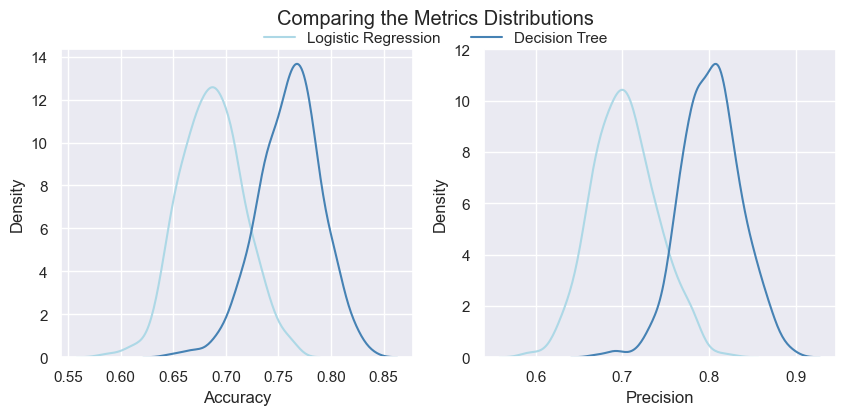

In [85]:
# plotting testing results for compaeringson
fig,ax =plt.subplots(1, 2, figsize=(10,4))
sns.kdeplot(accuracy_lr, color='lightblue', ax=ax[0], label='Logistic Regression')
sns.kdeplot(accuracy_dt, color='steelblue', ax=ax[0], label='Decision Tree')
sns.kdeplot(precision_lr, color='lightblue', ax=ax[1], label='Logistic Regression')
sns.kdeplot(precision_dt, color='steelblue', ax=ax[1], label='Decision Tree')
ax[0].set(xlabel = 'Accuracy')
ax[1].set(xlabel = 'Precision')
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol = 2,bbox_to_anchor=(0.5,0.96),frameon=False);
fig.suptitle('Comparing the Metrics Distributions')
plt.show()

**Task 6: Summary and business recommendations**

The main purpose of the analysis it to predict which recipes that will lead to high traffic on the website and potentially more subscribers. _The goal is to correctly predict high traffic recipes 80% of the times._ To be able to achieve this ambitious goal we recommend deploying the **Decision Tree Classifier**. This model is able to **_accurately classify recipes into high-traffic on average 76% of the times_**. Moreover, when the model **_predicts a recipe to lead to high-traffic, then it is a correct classification on average 80.2% of times._**

For future model development, it is recommended to focus on the following examples.
1. To increase the website traffic, we recommend that Tasty Bytes display more recipes from categories such as Vegetable, Potato, and Pork while reducing the number of Beverages and Breakfast recipes.
2. Identify and fix errors to improve accuracy and precision after testing.
3. Continuously improve the model by collecting more data, feature engineer and fine-tuning parameter.
4. Keep testing other models, so that we can keep making the best possible predictions.